In [1]:
import pandas as pd

In [2]:

features=pd.read_csv('E:/study/data/temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


**预处理**


In [3]:
print('数据维度：',features.shape)

数据维度： (348, 9)


In [4]:
##统计指标
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [5]:
##处理时间数据
import datetime

years=features['year']
months=features['month']
days=features['day']

#datatime格式
dates=[str(int(year)) + '-'+ str(int(month)) + '-' + str(int(day)) for year,month,day in zip(years,months,days)]
dates=[datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]
#dates[:5]


In [6]:
##准备画图
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')



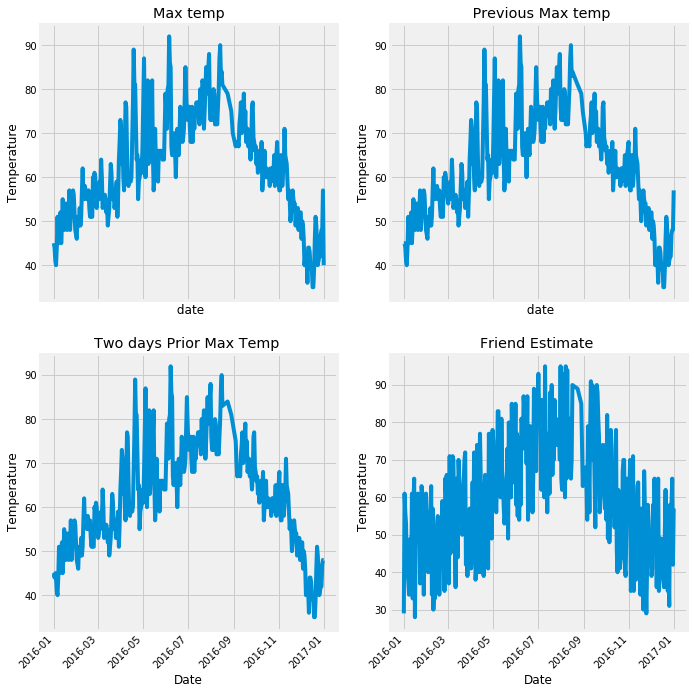

In [7]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,10))
fig.autofmt_xdate(rotation=45)


ax1.plot(dates,features['actual'])
ax1.set_xlabel(' date')
ax1.set_ylabel('Temperature')
ax1.set_title('Max temp')
##昨天最高温
ax2.plot(dates,features['temp_1'])
ax2.set_xlabel(' date')
ax2.set_ylabel('Temperature')
ax2.set_title(' Previous Max temp')

##前天最高温
ax3.plot(dates,features['temp_2'])
ax3.set_xlabel('Date')
ax3.set_ylabel('Temperature')
ax3.set_title('Two days Prior Max Temp ')

##朋友预测
ax4.plot(dates,features['friend'])
ax4.set_xlabel('Date')
ax4.set_ylabel('Temperature')
ax4.set_title('Friend Estimate ')
plt.tight_layout(pad=2)



In [8]:
features['friend'].head()

0    29
1    61
2    56
3    53
4    41
Name: friend, dtype: int64

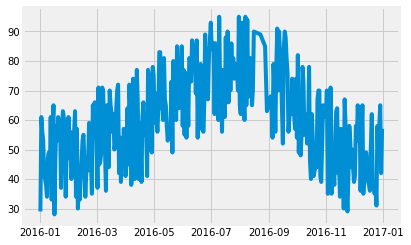

In [9]:
plt.plot(dates,features['friend'])

In [10]:
##对星期独热编码,分类型变量
features=pd.get_dummies(features)
features.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


**数据组合**

In [11]:
import numpy as np
##标签
labels=np.array(features['actual'])
##在特征中去掉标签
features=features.drop('actual',axis=1)
##保存特征名字
feature_list=list(features.columns)

##转换合适的格式
features=np.array(features)###很重要
features

array([[2.016e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.016e+03, 1.200e+01, 2.900e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 3.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

**在训练模型之前先划分数据**

In [12]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.25,random_state=42)
print('训练集特征：',train_features.shape)
print('训练集标签：',train_labels.shape)
print('测试集特征：',test_features.shape)
print('测试集标签：',test_labels.shape)

训练集特征： (261, 14)
训练集标签： (261,)
测试集特征： (87, 14)
测试集标签： (87,)


**随机森林回归模型**

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=42)
##训练
rf.fit(train_features,train_labels)
##预测结果
predictions=rf.predict(test_features)

##计算误差
errors=abs(predictions - test_labels)

mape=100*(errors/test_labels)##百分比

print('MAPE:',np.mean(mape))##平均绝对百分比误差

MAPE: 6.011244187972058


**其他评估指标**
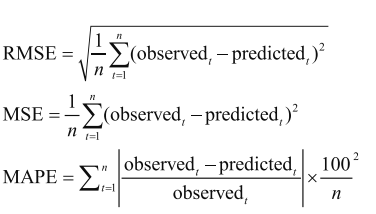

**树模型可视化**

In [14]:
from sklearn.tree import export_graphviz
import pydot

In [15]:
tree=rf.estimators_[5]##其中的一棵树
##导出文件
export_graphviz(tree,out_file='tree.dot',feature_names=feature_list,rounded=True,precision=1)
##绘图
(graph,)=pydot.graph_from_dot_file('tree.dot')
#展示
graph.write_png('tree.png')

In [16]:
##限制一下树模型
rf_small=RandomForestRegressor(n_estimators=10,max_depth=3,random_state=42)
rf_small.fit(train_features,train_labels)

##提取一棵树
tree_small=rf_small.estimators_[4]
##保存
export_graphviz(tree_small,out_file='small_tree.dot',feature_names=feature_list,rounded=True,precision=1)
##绘图
(graph,)=pydot.graph_from_dot_file('small_tree.dot')
#展示
graph.write_png('small_tree.png')

In [17]:
##得到特征重要性
importances=list(rf.feature_importances_)
##转换格式
feature_importances=[(feature,round(importance,2)) for feature,importance in zip(feature_list,importances)]
##排序
feature_importances=sorted(feature_importances,key=lambda x:x[1],reverse=True)

##打印
[print('Variable: {} Importance:{}'.format(*pair)) for pair in feature_importances]

Variable: temp_1 Importance:0.7
Variable: average Importance:0.19
Variable: day Importance:0.03
Variable: temp_2 Importance:0.02
Variable: friend Importance:0.02
Variable: month Importance:0.01
Variable: year Importance:0.0
Variable: week_Fri Importance:0.0
Variable: week_Mon Importance:0.0
Variable: week_Sat Importance:0.0
Variable: week_Sun Importance:0.0
Variable: week_Thurs Importance:0.0
Variable: week_Tues Importance:0.0
Variable: week_Wed Importance:0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 0, 'Variable Importances')

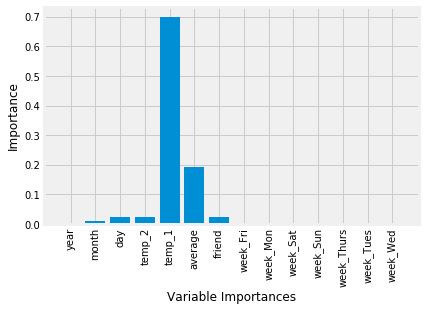

In [18]:
##转化成list格式
x_values=list(range(len(importances)))
plt.bar(x_values,importances,orientation='vertical')
plt.xticks(x_values,feature_list,rotation='vertical')
#
plt.ylabel('Importance')
plt.xlabel('Variable Importances')

**选择两个重要性最强的特征**

In [19]:
    rf_most_important=RandomForestRegressor(n_estimators=1000,random_state=42)
    ##将两个特征保存一起
    important_indices=[feature_list.index('temp_1'),feature_list.index('average')]
    train_important=train_features[:,important_indices]
    test_important=test_features[:,important_indices]
    ##训练
    rf_most_important.fit(train_important,train_labels)
    ##预测
    predictions=rf_most_important.predict(test_important)
    errors=abs(predictions-test_labels)
    ##评估结果
    print('Mean Absolute Error:',round(np.mean(errors),2),'degrees.')
    mape=np.mean(100*(errors/test_labels))
    print('mape:',mape)

Mean Absolute Error: 3.92 degrees.
mape: 6.229055723613811


**误差变大了，说明其他特征还是有价值的，不能仅凭特征重要性选取部分数据，一切要根据实验，当然要考虑时间效率在考虑是否提出部分特征**

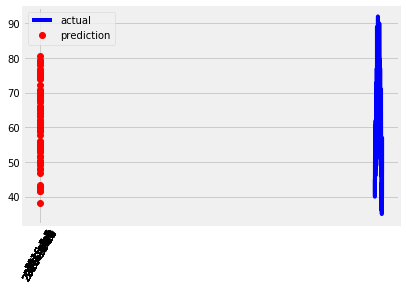

In [28]:
##日期数据
##days=features[:,feature_list.index('day')]
#years=features[:,feature_list.index('year')]
##转换日期格式
#dates=[str(int(year)) + '-'+ str(int(month)) + '-' + str(int(day)) for year,month,day in zip(years,months,days)]
#dates=[datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]
##创建表格保存日期和对应的标签数据值
true_data=pd.DataFrame(data={'date':dates,'actual':labels})
months=test_features[:,feature_list.index('month')]
days=test_features[:,feature_list.index('day')]
years=test_features[:,feature_list.index('year')]
test_dates=[str(int(year)) + '-'+ str(int(month)) + '-' + str(int(day)) for year,month,day in zip(years,months,days)]
#test_dates=[datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]
predictions_data=pd.DataFrame(data={'date':test_dates,'prediction':predictions})
plt.plot(true_data['date'],true_data['actual'],'b-',label='actual')
plt.plot(predictions_data['date'],predictions_data['prediction'],'r-',label='prediction')
plt.xticks(rotation='60')
plt.legend()

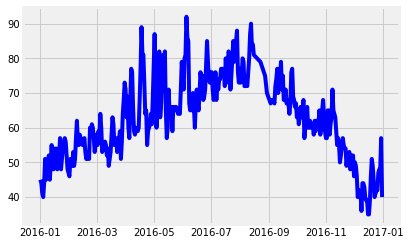

In [21]:
plt.plot(true_data['date'],true_data['actual'],'b-',label='actual')

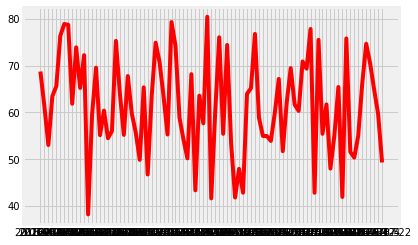

In [30]:
plt.plot(predictions_data['date'],predictions_data['prediction'],'r-',label='prediction')

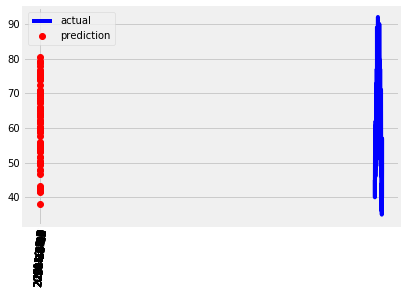

In [23]:
plt.plot(true_data['date'],true_data['actual'],'b-',label='actual')
plt.plot(predictions_data['date'],predictions_data['prediction'],'ro',label='prediction')
plt.xticks(rotation='85')
plt.legend()

In [24]:
test_features[:,feature_list.index('month')]

array([ 9.,  4., 11., 10.,  6.,  5.,  7.,  8., 10.,  6.,  3.,  6., 12.,
        4.,  6.,  2., 11.,  3.,  2.,  6., 10.,  2.,  6., 10.,  3.,  1.,
        5.,  1.,  5.,  7.,  4.,  4.,  1.,  8.,  8.,  2.,  2.,  1.,  9.,
       12.,  5.,  3.,  4.,  1., 10.,  5.,  3.,  7.,  3., 12., 12.,  1.,
       10.,  5.,  9., 10.,  2., 11.,  3.,  4.,  6.,  2.,  3.,  9.,  3.,
        4.,  7.,  7.,  7., 12.,  6.,  3.,  4.,  1.,  3.,  5.,  1.,  8.,
       12., 11., 11.,  4.,  6.,  6., 10.,  3., 12.])

In [25]:
test_features

array([[2.016e+03, 9.000e+00, 2.900e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 4.000e+00, 2.700e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.016e+03, 1.100e+01, 2.800e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.016e+03, 1.000e+01, 5.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.016e+03, 3.000e+00, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 2.200e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

array([ 9.,  4., 11., 10.,  6.,  5.,  7.,  8., 10.,  6.,  3.,  6., 12.,
        4.,  6.,  2., 11.,  3.,  2.,  6., 10.,  2.,  6., 10.,  3.,  1.,
        5.,  1.,  5.,  7.,  4.,  4.,  1.,  8.,  8.,  2.,  2.,  1.,  9.,
       12.,  5.,  3.,  4.,  1., 10.,  5.,  3.,  7.,  3., 12., 12.,  1.,
       10.,  5.,  9., 10.,  2., 11.,  3.,  4.,  6.,  2.,  3.,  9.,  3.,
        4.,  7.,  7.,  7., 12.,  6.,  3.,  4.,  1.,  3.,  5.,  1.,  8.,
       12., 11., 11.,  4.,  6.,  6., 10.,  3., 12.])

In [27]:
test_dates

['2016-9-29',
 '2016-4-27',
 '2016-11-28',
 '2016-10-12',
 '2016-6-19',
 '2016-5-7',
 '2016-7-25',
 '2016-8-15',
 '2016-10-28',
 '2016-6-5',
 '2016-3-19',
 '2016-6-7',
 '2016-12-10',
 '2016-4-23',
 '2016-6-24',
 '2016-2-9',
 '2016-11-10',
 '2016-3-21',
 '2016-2-28',
 '2016-6-28',
 '2016-10-6',
 '2016-2-17',
 '2016-6-15',
 '2016-10-15',
 '2016-3-26',
 '2016-1-26',
 '2016-5-23',
 '2016-1-10',
 '2016-5-22',
 '2016-7-15',
 '2016-4-22',
 '2016-4-29',
 '2016-1-23',
 '2016-8-16',
 '2016-8-1',
 '2016-2-27',
 '2016-2-12',
 '2016-1-31',
 '2016-9-5',
 '2016-12-20',
 '2016-5-1',
 '2016-3-28',
 '2016-4-21',
 '2016-1-6',
 '2016-10-21',
 '2016-5-2',
 '2016-3-1',
 '2016-7-21',
 '2016-3-17',
 '2016-12-6',
 '2016-12-21',
 '2016-1-4',
 '2016-10-2',
 '2016-5-28',
 '2016-9-11',
 '2016-10-25',
 '2016-2-18',
 '2016-11-1',
 '2016-3-16',
 '2016-4-26',
 '2016-6-10',
 '2016-2-3',
 '2016-3-7',
 '2016-9-18',
 '2016-3-20',
 '2016-4-6',
 '2016-7-2',
 '2016-7-5',
 '2016-7-19',
 '2016-12-9',
 '2016-6-29',
 '2016-3-22'